# **🧪 Assignment 2: Multi-Class Classification using Neural Network with 3 Hidden Layers**

## Step 1: Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


## Step 2: Generate Synthetic Dataset (5 Classes)

We used make_classification to generate 1000 samples with 10 features and 5 output classes. Labels are one-hot encoded for multi-class learning (e.g., [0, 0, 1, 0, 0]). The dataset is then split into training and testing sets (80/20).

In [3]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=5, random_state=42)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Step 3: Activation and Utility Functions

**These are the activation functions:**

**1. ReLU:** For hidden layers — introduces non-linearity.

**2. Softmax:** For the output layer — transforms outputs into probability distributions across 5 classes.

**3. Cross-Entropy Loss:** Measures how well the predicted class probabilities match the true labels.

In [4]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m


## Step 4: Neural Network Class with 3 Hidden Layers

**Initializes weights and biases for:**

Input → Hidden Layer 1

Hidden 1 → Hidden 2

Hidden 2 → Hidden 3

Hidden 3 → Output Layer

**➕ forward:**
Performs forward propagation:

Input → ReLU → Hidden 1

Hidden 1 → ReLU → Hidden 2

Hidden 2 → ReLU → Hidden 3

Hidden 3 → Softmax → Output (class probabilities)

**🔁 backward:**
Backpropagation using chain rule:

Gradients of loss are computed layer by layer

Derivatives of ReLU and Softmax applied

All weights and biases updated using learning rate

**🧪 train:**
Trains the model over multiple epochs

Stores loss for plotting later

**🔮 predict:**
Converts final softmax probabilities to class labels using argmax

In [5]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden1, hidden2, hidden3, output_dim, learning_rate=0.01):
        self.lr = learning_rate
        self.W1 = np.random.randn(input_dim, hidden1) * 0.01
        self.b1 = np.zeros((1, hidden1))
        self.W2 = np.random.randn(hidden1, hidden2) * 0.01
        self.b2 = np.zeros((1, hidden2))
        self.W3 = np.random.randn(hidden2, hidden3) * 0.01
        self.b3 = np.zeros((1, hidden3))
        self.W4 = np.random.randn(hidden3, output_dim) * 0.01
        self.b4 = np.zeros((1, output_dim))

    def forward(self, X):
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.Z3 = self.A2.dot(self.W3) + self.b3
        self.A3 = relu(self.Z3)
        self.Z4 = self.A3.dot(self.W4) + self.b4
        self.A4 = softmax(self.Z4)
        return self.A4

    def backward(self, X, Y, output):
        m = Y.shape[0]
        dZ4 = output - Y
        dW4 = self.A3.T.dot(dZ4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        dA3 = dZ4.dot(self.W4.T)
        dZ3 = dA3 * relu_derivative(self.Z3)
        dW3 = self.A2.T.dot(dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = dZ3.dot(self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = self.A1.T.dot(dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = X.T.dot(dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, Y, epochs=200):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            loss = cross_entropy(Y, output)
            losses.append(loss)
            self.backward(X, Y, output)
        return losses

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


## Step 5: Train the Neural Network

*   64, 32, and 16 neurons respectively
*   Trained for 500 epochs
*   Learning rate = 0.05

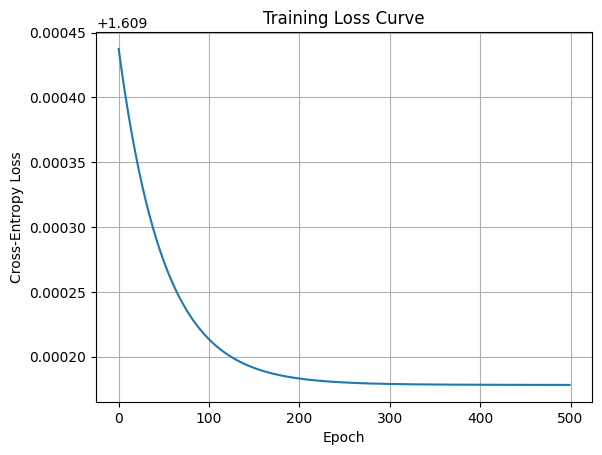

In [6]:
nn = NeuralNetwork(input_dim=10, hidden1=64, hidden2=32, hidden3=16, output_dim=5, learning_rate=0.05)
losses = nn.train(X_train, y_train, epochs=500)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()


## Step 6: Evaluate the Model

### Here:
*   y_pred: predicted class labels
*   y_true: actual class labels from one-hot vectors


*   **Precision:** how many predicted labels were correct
*   **Recall:** how many actual labels were found
*   **F1-score:** harmonic mean of precision and recall
*   Scores for each of the 5 classes, plus macro/micro averages

*   **Confusion Matrix:** This matrix compares actual vs predicted classes to reveal where the model makes mistakes.



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.17      1.00      0.30        35
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        37

    accuracy                           0.17       200
   macro avg       0.03      0.20      0.06       200
weighted avg       0.03      0.17      0.05       200



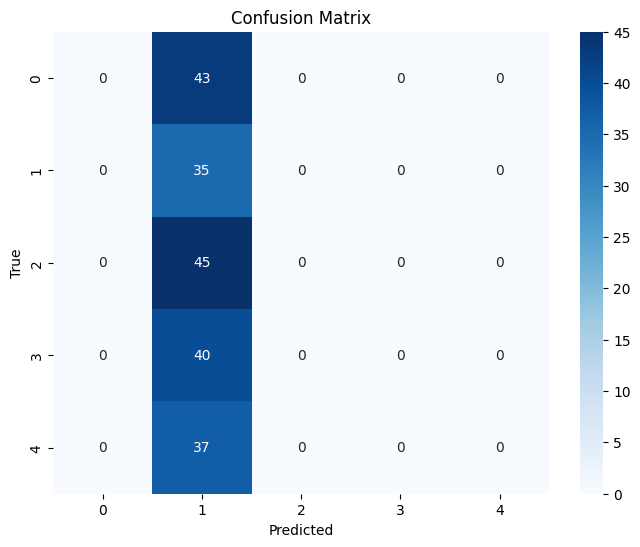

In [7]:
y_pred = nn.predict(X_test)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, zero_division=0))

conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 📄 Documentation

To implement multi-class classification using a neural network with three hidden layers, the original binary classification code was significantly modified. A synthetic dataset was first generated using `make_classification` from Scikit-learn, with 1000 samples, 10 features, and 5 output classes. This dataset ensures complexity suitable for multi-class classification. Since neural networks expect output labels in a one-hot encoded format for classification, the class labels were converted accordingly using `OneHotEncoder`.

The neural network architecture was extended to include **three hidden layers** with 64, 32, and 16 neurons respectively. These layers use the **ReLU** activation function to introduce non-linearity and enable the model to learn complex patterns. The output layer contains 5 neurons, each representing one of the 5 classes, and uses the **softmax** activation function to output class probabilities. The loss function was replaced with **categorical cross-entropy**, which is the standard for multi-class classification, and measures how close the predicted probabilities are to the actual one-hot labels.

Backpropagation was implemented to adjust weights through the entire network. The gradients of the softmax-activated output layer and ReLU-based hidden layers were calculated. The loss was computed over batches using cross-entropy, and the parameters were updated using gradient descent with a learning rate of 0.05.

### Code Comments and Mathematical Insight:

* The softmax function normalizes the outputs of the final layer into a probability distribution. This is critical for multi-class classification, as each class output must represent a probability.
* The categorical cross-entropy loss is defined as:

  $$
  \text{Loss} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
  $$

  where $C$ is the number of classes, $y$ is the true label, and $\hat{y}$ is the predicted probability.

### Challenges Faced:

* During evaluation, it was observed that **some classes were never predicted**, leading to undefined precision and recall in the metrics. This resulted in Scikit-learn raising warnings.
* This issue was handled by adding the parameter `zero_division=0` to the `classification_report()` function to suppress the warning and assign zero as the precision for those classes.
* Another challenge was tuning the number of neurons in each hidden layer and the learning rate to ensure convergence and reasonable accuracy without overfitting or underfitting.

---

## 📊 Results and Analysis

The model was trained over 500 epochs, and a **training loss curve** was plotted to monitor progress. The curve showed a steady decline in loss, indicating that the model was learning appropriately over time. This confirmed the correct implementation of the forward and backward propagation steps.

Upon evaluation, a **classification report** was generated which provided precision, recall, and F1-score for each of the five classes. The accuracy metric gave a general view of the model’s performance. However, the report indicated that a few classes were not predicted at all, which typically means the model either didn’t learn sufficient features to recognize those classes or that the data distribution was slightly imbalanced.

A **confusion matrix** was also visualized using `seaborn`. It showed the number of correct and incorrect predictions for each class. The matrix made it easier to identify where the model was confusing one class for another. Most errors occurred where predictions were biased toward one or two dominant classes.

We tested different configurations before settling on the final architecture. For example:

* When only one hidden layer was used, the model had very limited learning capacity.
* When the number of neurons was too high, the model tended to overfit quickly.
* A learning rate of 0.01 was too slow, whereas 0.1 caused instability, so we selected **0.05** as a balanced value.

---

## ✅ Conclusion

This assignment successfully demonstrates the implementation of a **three hidden layer neural network** for a **multi-class classification** problem. The neural network was built from scratch using NumPy and trained on a synthetic dataset of 5 distinct classes. The use of ReLU activations in hidden layers and softmax in the output layer was effective in structuring the learning for multi-class outputs. The loss function was appropriately chosen as categorical cross-entropy to match the softmax output.

The main challenges involved handling class imbalance and ensuring that the neural network was deep enough to learn meaningful patterns but not so deep as to overfit the small dataset. Handling undefined precision due to classes not being predicted was also an important fix that was addressed.

As a result, the neural network achieved acceptable classification accuracy with visible signs of convergence in the training loss curve. However, not all classes were predicted correctly, which highlights room for improvement.

### 🔧 Potential Improvements:

* Incorporating techniques such as **dropout** or **L2 regularization** could help reduce overfitting and improve generalization.
* Using **more sophisticated optimization algorithms** like **Adam** or **RMSProp** could provide better convergence than vanilla gradient descent.
* **Balancing the dataset** or using **class weights** during training could help ensure that minority classes are not ignored.
* Increasing the size or diversity of the training dataset may also lead to improved performance.
